# Breadth First Search

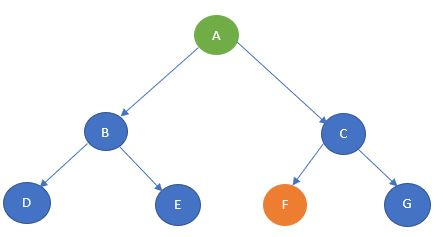

In [1]:
graph = {
 'A' : ['B','C'],
 'B' : ['D', 'E'],
 'C' : ['F', 'G'],
 'D' : [],
 'E' : [],
 'F' : [],
 'G' : []
}
visited = []
queue = []

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)
    while queue:
      s = queue.pop(0)
      if(s=='G'):
        break
      print (s, end = " --> ")
      for neighbour in graph[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)

bfs(visited, graph, 'A')

A --> B --> C --> D --> E --> F --> 

# Depth First Search

In [2]:
# Using a Python dictionary to act as an adjacency list
GRAPH = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F','G'],
    'D' : ['H'],
    'E' : [],
    'F' : [],
    'G':  []
}

visited = [] # Set to keep track of visited nodes.

def dfs(GRAPH, node, visitedSet = None, path = None):

    if visitedSet is None:
        visitedSet = set()
    if path is None:
        path = []

    visitedSet.add(node)
    path.append(node)
    if node in GRAPH:
        for neighbor in GRAPH[node]:
            if neighbor not in visitedSet:
                dfs(GRAPH, neighbor, visitedSet, path)
    return path

print(dfs(GRAPH, 'A'))

['A', 'B', 'D', 'H', 'E', 'C', 'F', 'G']


# Greedy best-first search algorithm

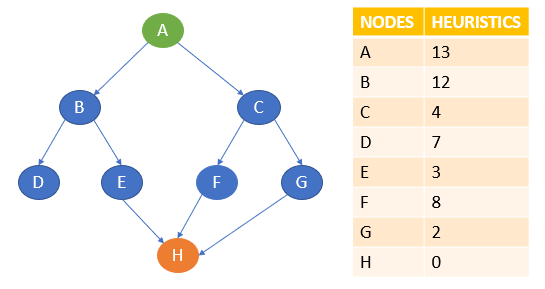

In [3]:
graph = {
'A':[('B',12), ('C',4)],
'B':[('D',7), ('E',3)],
'C':[('F',8), ('G',2)],
'D':[],
'E':[('H',0)],
'F':[('H',0)],
'G':[('H',0)]
}



def bfs(start, target, graph, queue=[], visited=[]):
    if start not in visited:
      print(start)
      visited.append(start)
    queue=queue+[x for x in graph[start] if x[0][0] not in visited]
    queue.sort(key=lambda x:x[1])
    if queue[0][0]==target:
        print(queue[0][0])
    else:
        processing=queue[0]
        queue.remove(processing)
        bfs(processing[0], target, graph, queue, visited)
bfs('A', 'H', graph)

A
C
G
H


# A* search algorithm

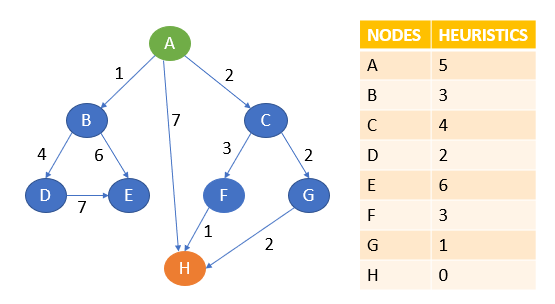

In [4]:
graph=[['A','B',1,3],
       ['A','C',2,4],
       ['A','H',7,0],
       ['B','D',4,2],
       ['B','E',6,6],
       ['C','F',3,3],
       ['C','G',2,1],
       ['D','E',7,6],
       ['D','H',5,0],
       ['F','H',1,0],
       ['G','H',2, 0]]
temp = []
temp1 = []
for i in graph:
    temp.append(i[0])
    temp1.append(i[1])
nodes = set(temp).union(set(temp1))
def A_star(graph, costs, open, closed, cur_node):
  if cur_node in open:
        open.remove(cur_node)
  closed.add(cur_node)
  for i in graph:
        if(i[0] == cur_node and costs[i[0]]+i[2]+i[3] < costs[i[1]]):
            open.add(i[1])
            costs[i[1]] =  costs[i[0]]+i[2]+i[3]
            path[i[1]] = path[i[0]] + ' -> ' + i[1]
  costs[cur_node] = 999999
  small = min(costs, key=costs.get)
  if small not in closed:
        A_star(graph, costs, open,closed, small)
costs = dict()
temp_cost = dict()
path = dict()
for i in nodes:
    costs[i] = 999999
    path[i] = ' '
open = set()
closed = set()
start_node = input("Enter the Start Node: ")
open.add(start_node)
path[start_node] = start_node
costs[start_node] = 0
A_star(graph, costs, open, closed, start_node)
goal_node = input("Enter the Goal Node: ")
print("Path with least cost is: ",path[goal_node])

Enter the Start Node: A
Enter the Goal Node: H
Path with least cost is:  A -> C -> G -> H


# Tic-Tac-Toe

In [ ]:
# Import libraries
import sys
import random
# This class represent a tic tac to game
class TicTacToeGame:
    # Create a new game
    def __init__(self, rows:int, columns:int, goal:int, max_depth:int=4):

        # Create the game state
        self.state = []
        self.tiles = {}
        self.inverted_tiles = {}
        tile = 0
        for y in range(rows):
            row = []
            for x in range(columns):
                row += '.'
                tile += 1
                self.tiles[tile] = (y, x)
                self.inverted_tiles[(y, x)] = tile
            self.state.append(row)
        # Set the number of noughts and crosses in a row that is needed to win the game
        self.goal = goal
        # Create vectors
        self.vectors = [(1,0), (0,1), (1,1), (-1,1)]
        # Set lengths
        self.rows = rows
        self.columns = columns
        self.max_row_index = rows - 1
        self.max_columns_index = columns - 1
        self.max_depth = max_depth
        # Heuristics for cutoff
        self.winning_positions = []
        self.get_winning_positions()
        # Set the starting player at random
        #self.player = 'O'
        self.player = random.choice(['X', 'O'])
    # Get winning positions
    def get_winning_positions(self):
        # Loop the board
        for y in range(self.rows):
            for x in range(self.columns):

                # Loop vectors
                for vector in self.vectors:

                    # Get the start position
                    sy, sx = (y, x)
                    # Get vector deltas
                    dy, dx = vector
                    # Create a counter
                    counter = 0
                    # Loop until we are outside the board
                    positions = []
                    while True:
                        # Add the position
                        positions.append(self.inverted_tiles.get((sy, sx)))
                        # Check if we have a winning position
                        if (len(positions) == self.goal):
                            # Add winning positions
                            self.winning_positions.append(positions)
                            # Break out from the loop
                            break
                        # Update the position
                        sy += dy
                        sx += dx

                        # Check if the loop should terminate
                        if(sy < 0 or abs(sy) > self.max_row_index or sx < 0 or abs(sx) > self.max_columns_index):
                            break
    # Play the game
    def play(self):
        # Variables
        result = None
        # Create an infinite loop
        print('Starting board')
        while True:
            # Draw the state
            self.print_state()
            # Get a move from a player
            if (self.player == 'X'): # AI
                # Print AI move
                print('Player X moving (AI) ...')
                # Get the best move
                max, py, px, depth = self.max(-sys.maxsize, sys.maxsize)
                # Get a heuristic move at cutoff
                print('Depth: {0}'.format(depth))
                if(depth > self.max_depth):
                    py, px = self.get_best_move()
                # Make a move
                self.state[py][px] = 'X'
                # Check if the game has ended, break out from the loop in that case
                result = self.game_ended()
                if(result != None):
                    break
                # Change turn
                self.player = 'O'
            elif (self.player == 'O'): # Human player

                # Print turn
                print('Player O moving (Human) ...')
                # Get a recommended move
                min, py, px, depth = self.min(-sys.maxsize, sys.maxsize)
                # Get a heuristic move at cutoff
                print('Depth: {0}'.format(depth))
                if(depth > self.max_depth):
                    py, px = self.get_best_move()
                # Print a recommendation
                print('Recommendation: {0}'.format(self.inverted_tiles.get((py, px))))
                # Get input
                number = int(input('Make a move (tile number): '))
                tile = self.tiles.get(number)
                # Check if the move is legal
                if(tile != None):

                    # Make a move
                    py, px = tile
                    self.state[py][px] = 'O'
                    # Check if the game has ended, break out from the loop in that case
                    result = self.game_ended()
                    if(result != None):
                        break
                    # Change turn
                    self.player = 'X'
                else:
                    print('Move is not legal, try again.')
        # Print result
        self.print_state()
        print('Winner is player: {0}'.format(result))
    # An evaluation function to get the best move based on heuristics
    def get_best_move(self):
        # Create an heuristic dictionary
        heuristics = {}
        # Get all empty cells
        empty_cells = []
        for y in range(self.rows):
            for x in range(self.columns):
                if (self.state[y][x] == '.'):
                    empty_cells.append((y, x))
        # Loop empty positions
        for empty in empty_cells:
            # Get numbered position
            number = self.inverted_tiles.get(empty)
            # Loop winning positions
            for win in self.winning_positions:
                # Check if number is in a winning position
                if(number in win):
                    # Calculate the number of X:s and O:s in the winning position
                    player_x = 0
                    player_o = 0
                    start_score = 1
                    for box in win:
                        # Get the position
                        y, x = self.tiles[box]
                        # Count X:s and O:s
                        if(self.state[y][x] == 'X'):
                            player_x += start_score if self.player == 'X' else start_score * 2
                            start_score *= 10
                        elif (self.state[y][x] == 'O'):
                            player_o += start_score if self.player == 'O' else start_score * 2
                            start_score *= 10
                    # Save heuristic
                    if(player_x == 0 or player_o == 0):
                        # Calculate a score
                        score = max(player_x, player_o) + start_score
                        # Update the score
                        if(heuristics.get(number) != None):
                            heuristics[number] += score
                        else:
                            heuristics[number] = score
        # Get the best move from the heuristic dictionary
        best_move = random.choice(empty_cells)
        best_count = -sys.maxsize
        for key, value in heuristics.items():
            if(value > best_count):
                best_move = self.tiles.get(key)
                best_count = value
        # Return the best move
        return best_move
    # Check if the game has ended
    def game_ended(self) -> str:
        # Check if a player has won
        result = self.player_has_won()
        if(result != None):
            return result
        # Check if the board is full
        for y in range(self.rows):
            for x in range(self.columns):
                if (self.state[y][x] == '.'):
                    return None
        # Return a tie
        return 'It is a tie!'

    # Check if a player has won
    def player_has_won(self) -> str:

        # Loop the board
        for y in range(self.rows):
            for x in range(self.columns):

                # Loop vectors
                for vector in self.vectors:

                    # Get the start position
                    sy, sx = (y, x)
                    # Get vector deltas
                    dy, dx = vector
                    # Create counters
                    steps = 0
                    player_x = 0
                    player_o = 0
                    # Loop until we are outside the board or have moved the number of steps in the goal
                    while steps < self.goal:
                        # Add steps
                        steps += 1
                        # Check if a player has a piece in the tile
                        if(self.state[sy][sx] == 'X'):
                            player_x += 1
                        elif(self.state[sy][sx] == 'O'):
                            player_o += 1
                        # Update the position
                        sy += dy
                        sx += dx

                        # Check if the loop should terminate
                        if(sy < 0 or abs(sy) > self.max_row_index or sx < 0 or abs(sx) > self.max_columns_index):
                            break
                    # Check if we have a winner
                    if(player_x >= self.goal):
                        return 'X'
                    elif(player_o >= self.goal):
                        return 'O'
        # Return None if no winner is found
        return None
    # Get a min value (O)
    def min(self, alpha:int=-sys.maxsize, beta:int=sys.maxsize, depth:int=0):

        # Variables
        min_value = sys.maxsize
        by = None
        bx = None

        # Check if the game has ended
        result = self.game_ended()
        if(result != None):
            if result == 'X':
                return 1, 0, 0, depth
            elif result == 'O':
                return -1, 0, 0, depth
            elif result == 'It is a tie!':
                return 0, 0, 0, depth
        elif(depth > self.max_depth):
            return 0, 0, 0, depth
        # Loop the board
        for y in range(self.rows):
            for x in range(self.columns):
                # Check if the tile is empty
                if (self.state[y][x] == '.'):
                    # Make a move
                    self.state[y][x] = 'O'
                    # Get max value
                    max, max_y, max_x, depth = self.max(alpha, beta, depth + 1)

                    # Set min value to max value if it is lower than curren min value
                    if (max < min_value):
                        min_value = max
                        by = y
                        bx = x

                    # Reset the tile
                    self.state[y][x] = '.'
                    # Do an alpha test
                    if (min_value <= alpha):
                        return min_value, bx, by, depth
                    # Do a beta test
                    if (min_value < beta):
                        beta = min_value
        # Return min value
        return min_value, by, bx, depth
    # Get max value (X)
    def max(self, alpha:int=-sys.maxsize, beta:int=sys.maxsize, depth:int=0):
        # Variables
        max_value = -sys.maxsize
        by = None
        bx = None
        # Check if the game has ended
        result = self.game_ended()
        if(result != None):
            if result == 'X':
                return 1, 0, 0, depth
            elif result == 'O':
                return -1, 0, 0, depth
            elif result == 'It is a tie!':
                return 0, 0, 0, depth
        elif(depth > self.max_depth):
            return 0, 0, 0, depth
        # Loop the board
        for y in range(self.rows):
            for x in range(self.columns):
                # Check if the current tile is empty
                if (self.state[y][x] == '.'):

                    # Add a piece to the board
                    self.state[y][x] = 'X'
                    # Set max value to min value if min value is greater than current max value
                    min, min_y, min_x, depth = self.min(alpha, beta, depth + 1)
                    # Adjust the max value
                    if (min > max_value):
                        max_value = min
                        by = y
                        bx = x
                    # Reset the tile
                    self.state[y][x] = '.'
                    # Do a beta test
                    if (max_value >= beta):
                        return max_value, bx, by, depth
                    # Do an alpha test
                    if (max_value > alpha):
                        alpha = max_value
        # Return max value
        return max_value, by, bx, depth
    # Print the current game state
    def print_state(self):
        for y in range(self.rows):
            print('| ', end='')
            for x in range(self.columns):
                if (self.state[y][x] != '.'):
                    print(' {0}  | '.format(self.state[y][x]), end='')
                else:
                    digit = str(self.inverted_tiles.get((y,x))) if len(str(self.inverted_tiles.get((y,x)))) > 1 else ' ' + str(self.inverted_tiles.get((y,x)))
                    print('{0}  | '.format(digit), end='')
            print()
        print()
# The main entry point for this module
def main():
    # Create a game
    #game = TicTacToeGame(7, 6, 4, 1000)
    game = TicTacToeGame(3, 3, 3, 1000)
    # Play the game
    game.play()
# Tell python to run main method
if __name__ == "__main__": main()



Starting board
|  1  |  2  |  3  | 
|  4  |  5  |  6  | 
|  7  |  8  |  9  | 

Player X moving (AI) ...
Depth: 1029
|  1  |  2  |  3  | 
|  4  |  X  |  6  | 
|  7  |  8  |  9  | 

Player O moving (Human) ...
Depth: 1012
Recommendation: 1
Make a move (tile number): 1
|  O  |  2  |  3  | 
|  4  |  X  |  6  | 
|  7  |  8  |  9  | 

Player X moving (AI) ...
Depth: 702
|  O  |  X  |  3  | 
|  4  |  X  |  6  | 
|  7  |  8  |  9  | 

Player O moving (Human) ...
Depth: 268
Recommendation: 8
Make a move (tile number): 8
|  O  |  X  |  3  | 
|  4  |  X  |  6  | 
|  7  |  O  |  9  | 

Player X moving (AI) ...
Depth: 104
|  O  |  X  |  3  | 
|  X  |  X  |  6  | 
|  7  |  O  |  9  | 

Player O moving (Human) ...
Depth: 32
Recommendation: 6
Make a move (tile number): 6
|  O  |  X  |  3  | 
|  X  |  X  |  O  | 
|  7  |  O  |  9  | 

Player X moving (AI) ...
Depth: 11
|  O  |  X  |  X  | 
|  X  |  X  |  O  | 
|  7  |  O  |  9  | 

Player O moving (Human) ...
Depth: 4
Recommendation: 7
Make a move (til